In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from lxml import etree
import numpy as np
import glob
from matplotlib.patches import Rectangle

In [2]:
print("Tensorflow version: {}".format(tf.__version__))
img = tf.io.read_file("./dataset/image_position_dataset/images/Abyssinian_1.jpg")
img = tf.image.decode_jpeg(img)
print(img.shape)

Tensorflow version: 2.10.0
(400, 600, 3)


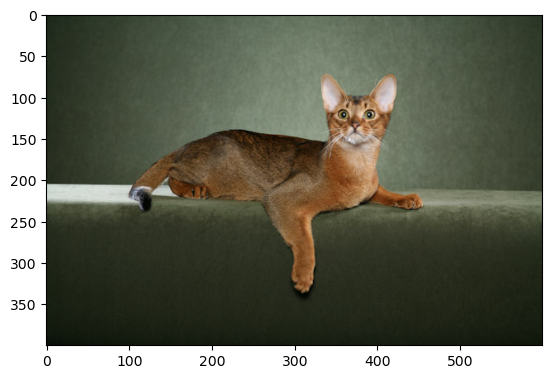

In [3]:
plt.imshow(img)

In [4]:
xml = open("./dataset/image_position_dataset/annotations/xmls/Abyssinian_1.xml").read()

In [5]:
select = etree.HTML(xml)

In [6]:
width = int(select.xpath("//size/width/text()")[0])
width

600

In [7]:
height = int(select.xpath("//size/height/text()")[0])

In [8]:
height

400

In [9]:
xmin = int(select.xpath("//object/bndbox/xmin/text()")[0])
ymin = int(select.xpath("//object/bndbox/ymin/text()")[0])
xmax = int(select.xpath("//object/bndbox/xmax/text()")[0])
ymax = int(select.xpath("//object/bndbox/ymax/text()")[0])

In [10]:
print("xmin: {},ymin: {},xmax: {},ymax: {}".format(xmin,ymin,xmax,ymax))

xmin: 333,ymin: 72,xmax: 425,ymax: 158


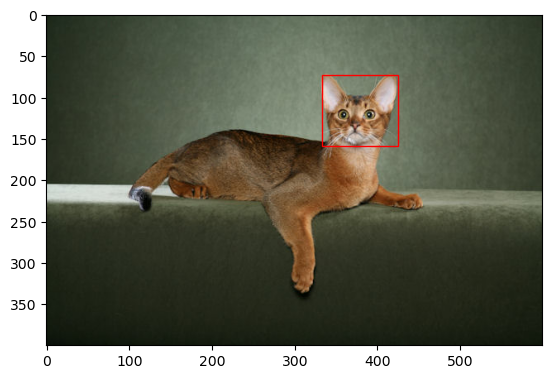

In [11]:
# 绘制图片上的矩形
plt.imshow(img)
rect = Rectangle((xmin,ymin), (xmax-xmin), (ymax-ymin), fill=False, color="red")
ax = plt.gca()
ax.axes.add_patch(rect)

In [12]:
img = tf.image.resize(img, [224,224])
img = img/255

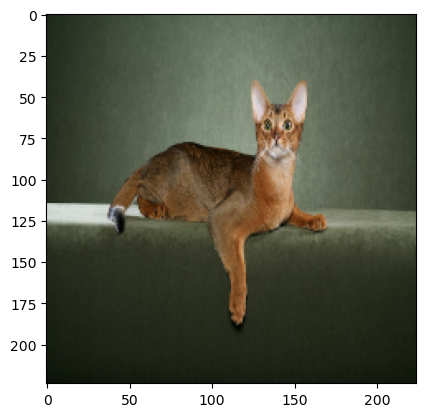

In [13]:
plt.imshow(img)

In [14]:
xmin = (xmin/width)* 224
ymin = (ymin/height) * 224
xmax = (xmax/width) * 224
ymax = (ymax/height) * 224

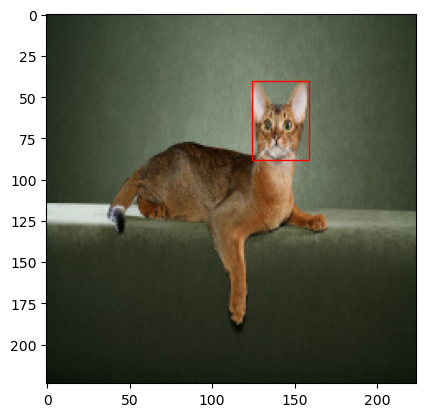

In [15]:
plt.imshow(img)
rect = Rectangle((xmin,ymin), (xmax-xmin), (ymax-ymin), fill=False, color="red")
ax = plt.gca()
ax.axes.add_patch(rect)

# 创建输入管道

In [16]:
# 读取所有的图像
images = glob.glob("./dataset/image_position_dataset/images/*.jpg")

In [17]:
images[:5]

['./dataset/image_position_dataset/images\\Abyssinian_1.jpg',
 './dataset/image_position_dataset/images\\Abyssinian_10.jpg',
 './dataset/image_position_dataset/images\\Abyssinian_100.jpg',
 './dataset/image_position_dataset/images\\Abyssinian_101.jpg',
 './dataset/image_position_dataset/images\\Abyssinian_102.jpg']

In [18]:
len(images)

7390

In [19]:
xmls = glob.glob("./dataset/image_position_dataset/annotations/xmls/*.xml")

In [20]:
xmls[:3]

['./dataset/image_position_dataset/annotations/xmls\\Abyssinian_1.xml',
 './dataset/image_position_dataset/annotations/xmls\\Abyssinian_10.xml',
 './dataset/image_position_dataset/annotations/xmls\\Abyssinian_100.xml']

In [21]:
xmls[-3:]

['./dataset/image_position_dataset/annotations/xmls\\yorkshire_terrier_188.xml',
 './dataset/image_position_dataset/annotations/xmls\\yorkshire_terrier_189.xml',
 './dataset/image_position_dataset/annotations/xmls\\yorkshire_terrier_190.xml']

In [22]:
len(xmls)

3686

In [23]:
names = [xml.split("\\")[-1].split(".xml")[0] for xml in xmls]

In [24]:
images_train = [image for image in images if (image.split("\\")[-1].split(".jpg")[0]) in names]

In [25]:
len(images_train)

3686

In [26]:
images_test = [image for image in images if (image.split("\\")[-1].split(".jpg")[0]) not in names]

In [27]:
len(images_test)

3704

In [28]:
images_train.sort(key=lambda x:x.split("\\")[-1].split(".jpg")[0])
xmls.sort(key=lambda x:x.split("\\")[-1].split(".xml")[0])

In [29]:
images_train[-5:]

['./dataset/image_position_dataset/images\\yorkshire_terrier_186.jpg',
 './dataset/image_position_dataset/images\\yorkshire_terrier_187.jpg',
 './dataset/image_position_dataset/images\\yorkshire_terrier_188.jpg',
 './dataset/image_position_dataset/images\\yorkshire_terrier_189.jpg',
 './dataset/image_position_dataset/images\\yorkshire_terrier_190.jpg']

In [30]:
xmls[-5:]

['./dataset/image_position_dataset/annotations/xmls\\yorkshire_terrier_186.xml',
 './dataset/image_position_dataset/annotations/xmls\\yorkshire_terrier_187.xml',
 './dataset/image_position_dataset/annotations/xmls\\yorkshire_terrier_188.xml',
 './dataset/image_position_dataset/annotations/xmls\\yorkshire_terrier_189.xml',
 './dataset/image_position_dataset/annotations/xmls\\yorkshire_terrier_190.xml']

In [31]:
# 处理xml标签信息的，返回xmin、xmax、ymin、ymax分别于width和height的比例
def deal_labels(path):
    xml = open("{}".format(path)).read()
    select = etree.HTML(xml)
    width = int(select.xpath("//size/width/text()")[0])
    height = int(select.xpath("//size/height/text()")[0])
    xmin = int(select.xpath("//object/bndbox/xmin/text()")[0])
    ymin = int(select.xpath("//object/bndbox/ymin/text()")[0])
    xmax = int(select.xpath("//object/bndbox/xmax/text()")[0])
    ymax = int(select.xpath("//object/bndbox/ymax/text()")[0])
    return [xmin/width, xmax/width, ymin/height, ymax/height]

In [32]:
labels = [deal_labels(path) for path in xmls]

In [33]:
labels[:5]

[[0.555, 0.7083333333333334, 0.18, 0.395],
 [0.192, 0.768, 0.21, 0.582],
 [0.383248730964467, 0.850253807106599, 0.142, 0.534],
 [0.12, 0.7088888888888889, 0.11501597444089456, 0.7507987220447284],
 [0.046, 0.65, 0.05806451612903226, 0.6881720430107527]]

In [34]:
xmin_width_rate,xmax_width_rate,ymin_height_rate,ymax_height_rate=list(zip(*labels))

In [35]:
xmin_width_rate[:5]

(0.555, 0.192, 0.383248730964467, 0.12, 0.046)

In [36]:
xmin_width_rate = np.array(xmin_width_rate)
xmax_width_rate = np.array(xmax_width_rate)
ymin_height_rate = np.array(ymin_height_rate)
ymax_height_rate = np.array(ymax_height_rate)

In [37]:
train_label_dataset = tf.data.Dataset.from_tensor_slices((xmin_width_rate,xmax_width_rate,ymin_height_rate,ymax_height_rate))

In [38]:
train_label_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.float64, name=None))>

In [ ]:
# 读取图片
def read_jpg(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    return image

In [ ]:
# 归一化
def normalize(input_image):
    input_image = tf.image.resize(input_image, [224,224])
    input_image = tf.cast(input_image, tf.float32)/127.5 - 1
    return input_image

In [39]:
# 加载处理图片
@tf.function
def load_image(path):
    input_image = read_jpg(path)
    input_image = normalize(input_image)
    return input_image

In [40]:
train_image_dataset = tf.data.Dataset.from_tensor_slices(images_train)

In [41]:
train_image_dataset = train_image_dataset.map(load_image)

In [42]:
train_image_dataset

<MapDataset element_spec=TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None)>

In [43]:
train_dataset = tf.data.Dataset.zip((train_image_dataset, train_label_dataset))

In [44]:
BATCH_SIZE = 32

In [45]:
train_dataset = train_dataset.shuffle(len(images_train)).repeat().batch(BATCH_SIZE)

In [46]:
test_count = int(len(images_train) * 0.2)
train_count = len(images_train) - test_count

In [47]:
train_dataset = train_dataset.skip(test_count)
test_dataset = train_dataset.take(test_count)

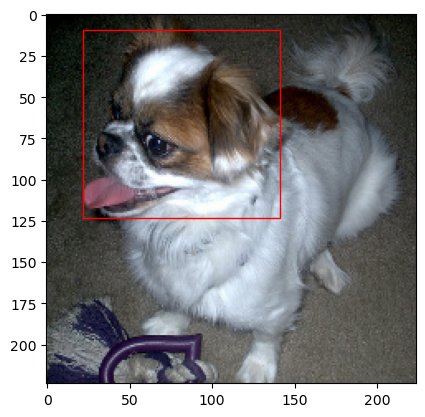

In [48]:
for image, label in train_dataset.take(1):
    plt.imshow(tf.keras.preprocessing.image.array_to_img(image[1]))
    xmin_width_rate,xmax_width_rate,ymin_height_rate,ymax_height_rate = label
    xmin,xmax,ymin,ymax = xmin_width_rate[1].numpy()*224,xmax_width_rate[1].numpy()*224,ymin_height_rate[1].numpy()*224,ymax_height_rate[1].numpy()*224
    rect = Rectangle((xmin,ymin), (xmax-xmin), (ymax-ymin), fill=False, color="red")
    ax = plt.gca()
    ax.axes.add_patch(rect)

# 图像定位模型创建

In [49]:
# 创建预训练模型
xception = tf.keras.applications.Xception(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)

In [50]:
## 创建输入
inputs = tf.keras.layers.Input(shape=(224,224,3))

x = xception(inputs)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(4096, activation="relu")(x)
x = tf.keras.layers.Dense(1000, activation="relu")(x)

# 作为线性回归输出的
xminout = tf.keras.layers.Dense(1)(x)
xmaxout = tf.keras.layers.Dense(1)(x)
yminout = tf.keras.layers.Dense(1)(x)
ymaxout = tf.keras.layers.Dense(1)(x)

prediction = [xminout, xmaxout, yminout, ymaxout]

model = tf.keras.models.Model(
    inputs=inputs,
    outputs=prediction
)

In [51]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 xception (Functional)          (None, 7, 7, 2048)   20861480    ['input_2[0][0]']                
                                                                                                  
 global_average_pooling2d (Glob  (None, 2048)        0           ['xception[0][0]']               
 alAveragePooling2D)                                                                              
                                                                                              

In [52]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss="mse",
    metrics=["mae"]
)

In [53]:
EPOCH = 50

In [ ]:
history = model.fit(
    train_dataset,
    epochs=EPOCH,
    steps_per_epoch=train_count//BATCH_SIZE,
    validation_data=test_dataset,
    validation_steps=test_count//BATCH_SIZE
)

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(EPOCH)

plt.figure()
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "bo", label="Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss Value")
plt.legend()
plt.show()

# 模型保存及预测

In [ ]:
model.save("detect_v1.h5")

In [ ]:
new_model = tf.keras.models.load_model("detect_v1.h5")

In [ ]:
plt.figure(figsize=(8,24))
for image, _ in test_dataset.take(1):
    outxmin, outxmax, outymin, outymax = new_model.predict(image)
    for i in range(3):
        plt.subplot(3, 1, i+1)
        plt.imshow(tf.keras.preprocessing.image.array_to_img(image[0]))
        xmin, xmax, ymin, ymax = outxmin[i]*224,outxmax[i]*224,outymin[i]*224,outymax[i]*224
        rect = Rectangle((xmin,ymin), (xmax-xmin), (ymax-ymin), fill=False, color="red")
        ax = plt.gca()
        ax.axes.add_patch(rect)